In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data=pd.read_csv("/content/youtube_channel_real_performance_analytics (1).csv")

In [3]:
print(data.head())

   ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0   0           201.0  2016-06-02 00:00:00                   0    2      6   
1   1           391.0  2016-06-10 00:00:00                   8   10      6   
2   2           133.0  2016-06-14 00:00:00                   4   14      6   
3   3            14.0  2016-06-29 00:00:00                  15   29      6   
4   4            45.0  2016-07-01 00:00:00                   2    1      7   

   Year Day of Week  Revenue per 1000 Views (USD)  \
0  2016    Thursday                         0.024   
1  2016      Friday                         0.056   
2  2016     Tuesday                         0.014   
3  2016   Wednesday                         0.004   
4  2016      Friday                         0.000   

   Monetized Playbacks (Estimate)  ...  Watched (Not Skipped) (%)  \
0                           723.0  ...                        0.0   
1                           727.0  ...                        0.0   
2    

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [5]:
print(data.isnull().sum())

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64


In [7]:
data = data.dropna()

In [8]:
import isodate
data['Video Duration'] = data['Video Duration'].apply(lambda x:
isodate.parse_duration(x).total_seconds())

ModuleNotFoundError: No module named 'isodate'

In [9]:
!pip install isodate

In [13]:
import isodate
def convert_duration(x):
    if isinstance(x, str):  # Only parse if it's a string
        return isodate.parse_duration(x).total_seconds()
    return float(x)  # Already a number


In [14]:
data['Video Duration'] = data['Video Duration'].apply(convert_duration)

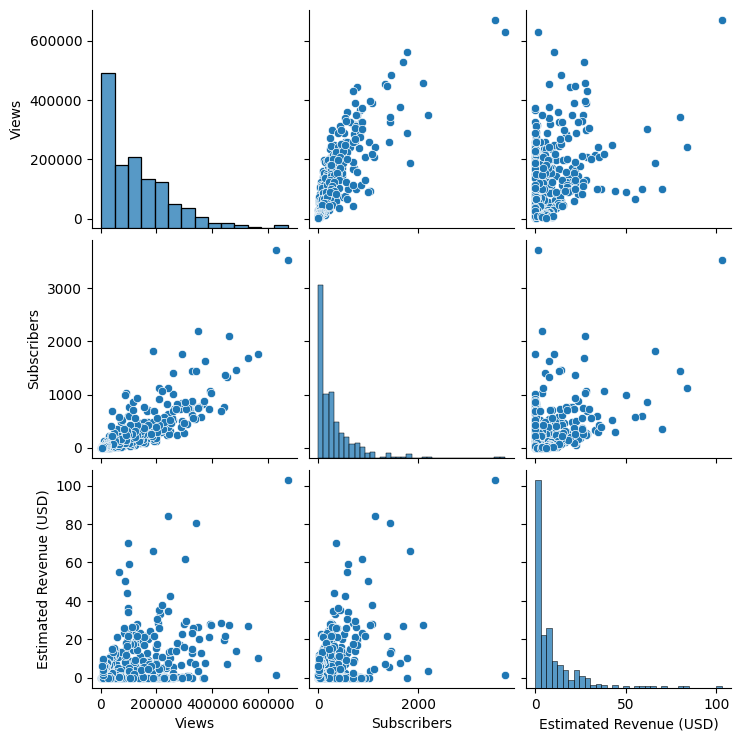

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Exploratory Data Analysis (EDA)
sns.pairplot(data[['Views', 'Subscribers', 'Estimated Revenue (USD)']])
plt.show()

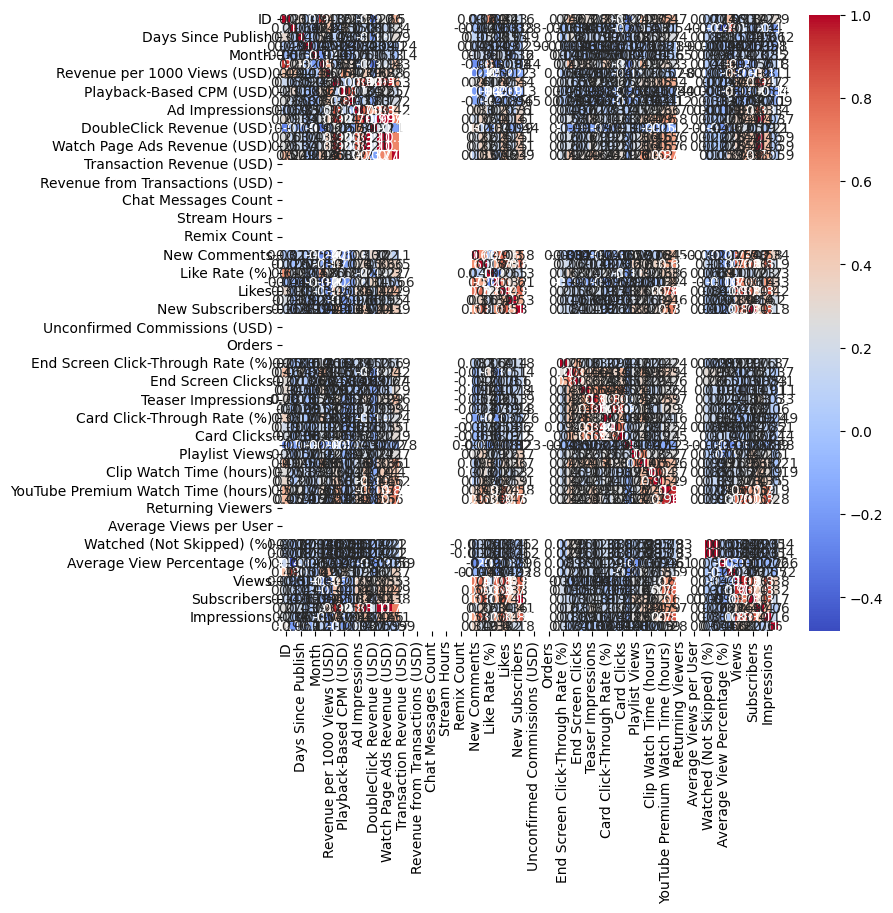

In [18]:
plt.figure(figsize=(8,8))
numeric_data = data.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [19]:
#Top Performers by Revenue:

top_videos = data.sort_values(by='Estimated Revenue (USD)',
ascending=False).head(10)
print(top_videos[['ID', 'Estimated Revenue (USD)', 'Views',
'Subscribers']])



      ID  Estimated Revenue (USD)     Views  Subscribers
228  228                  103.117  670990.0       3538.0
257  257                   83.979  241060.0       1125.0
251  251                   80.265  343319.0       1437.0
289  289                   70.247   99196.0        350.0
278  278                   65.978  188324.0       1824.0
260  260                   62.047  302999.0        866.0
293  293                   59.058  101025.0        602.0
294  294                   55.040   67556.0        581.0
290  290                   50.344   89284.0        995.0
284  284                   44.228   93487.0        305.0


In [21]:
 #Feature Engineering
data['Revenue per View'] = data['Estimated Revenue (USD)'] / data['Views']
data['Engagement Rate'] = (data['Likes'] + data['Shares'] + data['New Comments']) / data['Views'] * 100

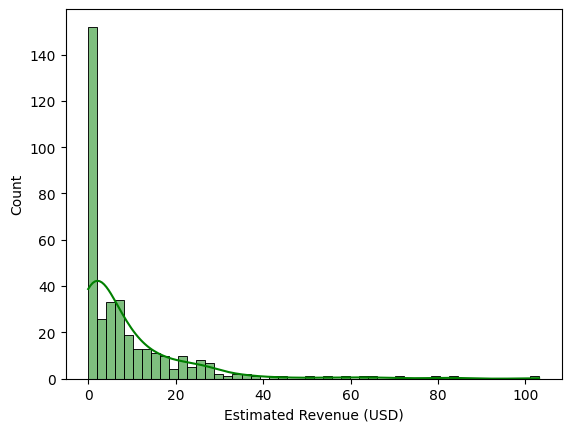

In [22]:

#data visualization
sns.histplot(data['Estimated Revenue (USD)'], bins=50, kde=True, color='green')
plt.show()

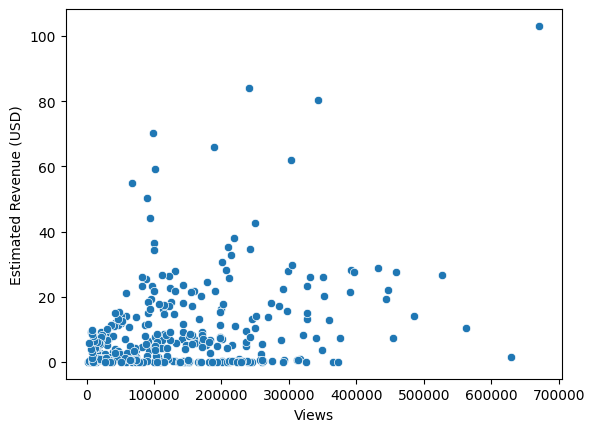

In [23]:
#Views vs Revenue:
sns.scatterplot(x=data['Views'], y=data['Estimated Revenue (USD)'])
plt.show()


In [25]:
# Select features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares',
'New Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'
X = data[features]
y = data[target]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [26]:
#Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Predict on test data
y_pred = model.predict(X_test)


In [28]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 75.70
R-squared: 0.13


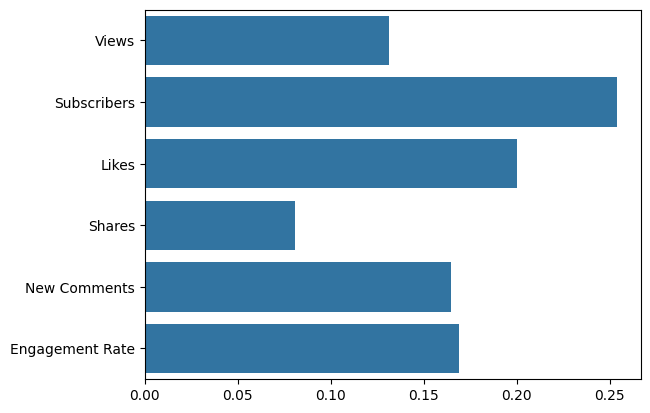

In [29]:
#Feature Importance
importances = model.feature_importances_
sns.barplot(x=importances, y=features)
plt.show()

In [30]:
#Save Your Model
import joblib
joblib.dump(model, 'youtube_revenue_predictor.pkl')

['youtube_revenue_predictor.pkl']

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
data=pd.read_csv("/content/youtube_channel_real_performance_analytics (1).csv")

In [34]:
# Preview the dataset
print(data.head())
# Display basic information about the dataset
print(data.info())
# Check for null values
print(data.isnull().sum())

   ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0   0           201.0  2016-06-02 00:00:00                   0    2      6   
1   1           391.0  2016-06-10 00:00:00                   8   10      6   
2   2           133.0  2016-06-14 00:00:00                   4   14      6   
3   3            14.0  2016-06-29 00:00:00                  15   29      6   
4   4            45.0  2016-07-01 00:00:00                   2    1      7   

   Year Day of Week  Revenue per 1000 Views (USD)  \
0  2016    Thursday                         0.024   
1  2016      Friday                         0.056   
2  2016     Tuesday                         0.014   
3  2016   Wednesday                         0.004   
4  2016      Friday                         0.000   

   Monetized Playbacks (Estimate)  ...  Watched (Not Skipped) (%)  \
0                           723.0  ...                        0.0   
1                           727.0  ...                        0.0   
2    

In [35]:
# Convert 'Video Publish Time' to datetime format
data['Video Publish Time'] = pd.to_datetime(data['Video Publish Time'])


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns



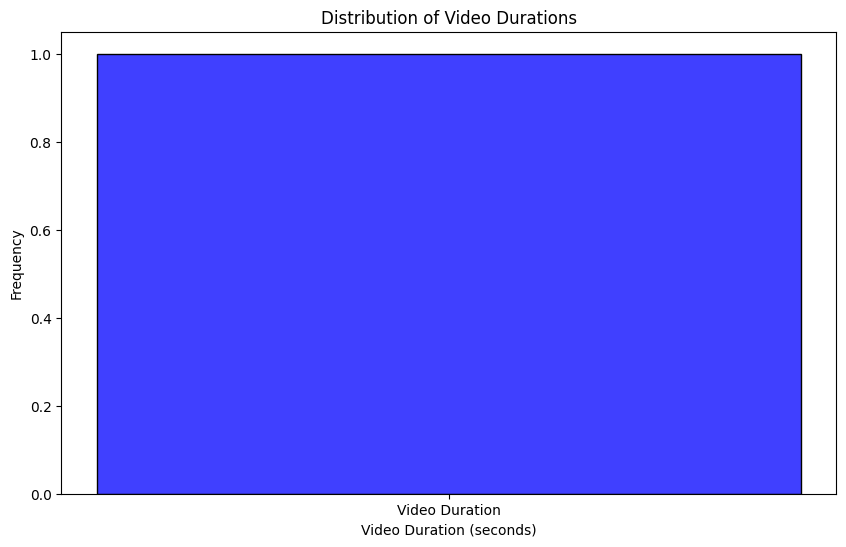

In [37]:
# Distribution of video durations
plt.figure(figsize=(10, 6))
sns.histplot(data=['Video Duration'], bins=30, kde=False, color='blue')
plt.title('Distribution of Video Durations')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


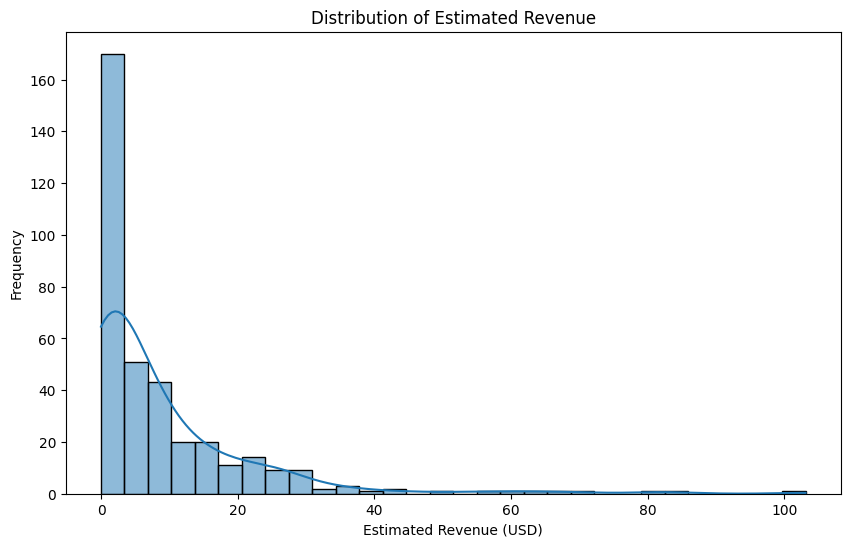

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Revenue (USD)'], bins=30, kde=True)
plt.title('Distribution of Estimated Revenue')
plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])



In [41]:
# Compute the correlation matrix
corr = numeric_data.corr()

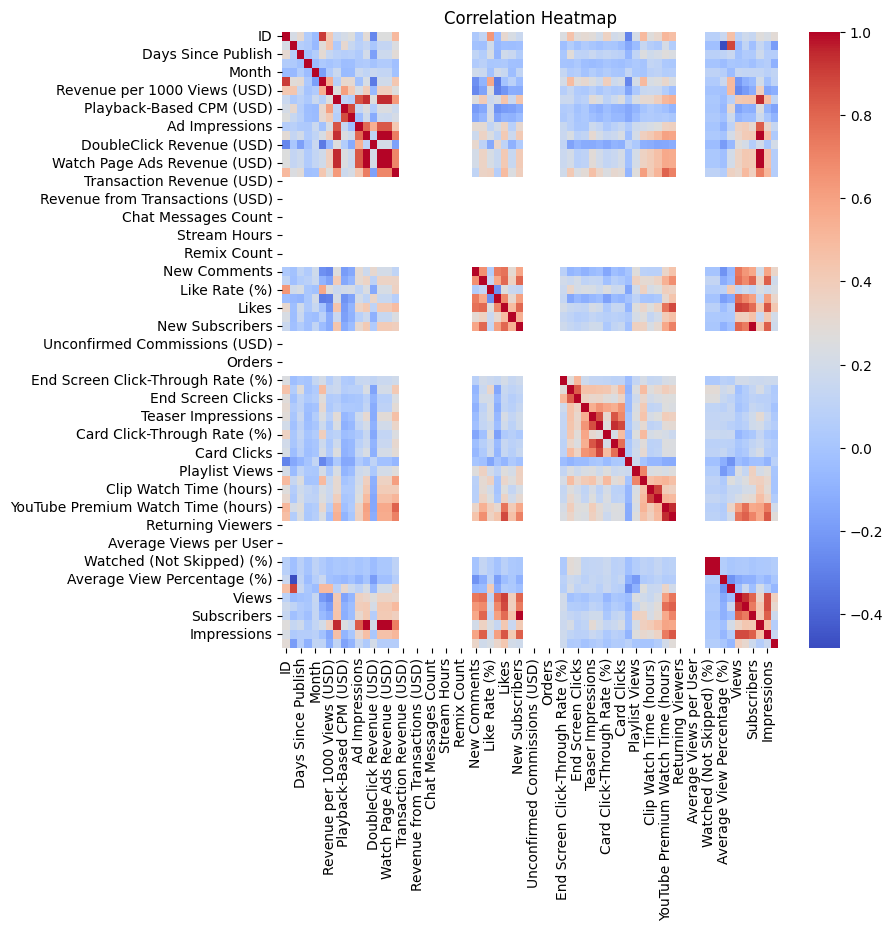

In [45]:
# Plot the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [47]:
X = numeric_data.drop(columns=['Estimated Revenue (USD)'])
y = numeric_data['Estimated Revenue (USD)']

In [48]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [49]:
# Make predictions
y_pred = model.predict(X_test)

In [50]:
# Calculate the prediction accuracy
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(8.700635795020329)